In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [5]:
data = pd.read_csv('/content/league_of_legends_data_large.csv')

In [7]:
X = data.drop('win', axis=1)
y = data['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32) \

print("Data loading and preprocessing complete.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data loading and preprocessing complete.
X_train shape: torch.Size([800, 8])
y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 8])
y_test shape: torch.Size([200])


In [9]:
input_dim = X_train.shape[1]

linear = nn.Linear(input_dim, 1)

def forward(x):
    logits = linear(x)
    y_pred = torch.sigmoid(logits)
    return y_pred

criterion = nn.BCELoss()
optimizer = optim.SGD(linear.parameters(), lr=0.01)


In [10]:
if isinstance(X_train, np.ndarray):
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train).view(-1, 1)

if isinstance(X_test, np.ndarray):
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test).view(-1, 1)

input_dim = X_train.shape[1]
linear = nn.Linear(input_dim, 1)
criterion = nn.BCELoss()
optimizer = optim.SGD(linear.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(1, num_epochs + 1):
    linear.train()
    optimizer.zero_grad()
    logits = linear(X_train)
    outputs = torch.sigmoid(logits)

    loss = criterion(outputs, y_train.view(-1,1))

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

linear.eval()
with torch.no_grad():
    train_outputs = torch.sigmoid(linear(X_train))
    train_predictions = (train_outputs >= 0.5).float()
    train_accuracy = (train_predictions == y_train.view(-1,1)).float().mean().item()
    test_outputs = torch.sigmoid(linear(X_test))
    test_predictions = (test_outputs >= 0.5).float()
    test_accuracy = (test_predictions == y_test.view(-1,1)).float().mean().item()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.7196
Epoch [200/1000], Loss: 0.7068
Epoch [300/1000], Loss: 0.6987
Epoch [400/1000], Loss: 0.6936
Epoch [500/1000], Loss: 0.6905
Epoch [600/1000], Loss: 0.6885
Epoch [700/1000], Loss: 0.6873
Epoch [800/1000], Loss: 0.6865
Epoch [900/1000], Loss: 0.6860
Epoch [1000/1000], Loss: 0.6857
Training Accuracy: 0.5562
Test Accuracy: 0.5400


In [11]:
optimizer = optim.SGD(linear.parameters(), lr=0.01, weight_decay=0.001)
num_epochs = 1000
for epoch in range(1, num_epochs + 1):
    linear.train()
    optimizer.zero_grad()
    logits = linear(X_train)
    outputs = torch.sigmoid(logits)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

linear.eval()
with torch.no_grad():
    train_outputs = torch.sigmoid(linear(X_train))
    train_predictions = (train_outputs >= 0.5).float()
    train_accuracy = (train_predictions == y_train.view(-1, 1)).float().mean().item()

    test_outputs = torch.sigmoid(linear(X_test))
    test_predictions = (test_outputs >= 0.5).float()
    test_accuracy = (test_predictions == y_test.view(-1, 1)).float().mean().item()

print(f'Training Accuracy (with L2): {train_accuracy:.4f}')
print(f'Test Accuracy (with L2): {test_accuracy:.4f}')

from sklearn.metrics import classification_report

print("Classification Report (Training Data):")
print(classification_report(y_train.cpu().numpy(), train_predictions.cpu().numpy()))

print("Classification Report (Test Data):")
print(classification_report(y_test.cpu().numpy(), test_predictions.cpu().numpy()))


Epoch [100/1000], Loss: 0.6856
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6854
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Training Accuracy (with L2): 0.5437
Test Accuracy (with L2): 0.5200
Classification Report (Training Data):
              precision    recall  f1-score   support

         0.0       0.54      0.52      0.53       395
         1.0       0.55      0.57      0.56       405

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.49      0.43      0.46        95
         1.0       0.54      0.60      0.57       105

    accuracy                           0.52       200
  

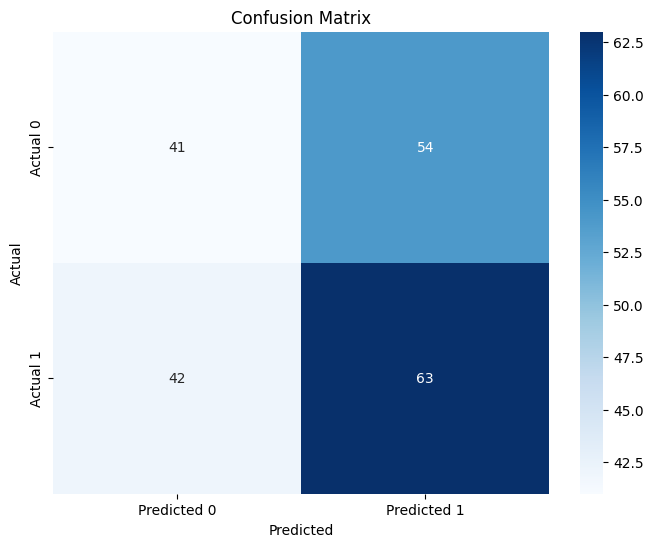

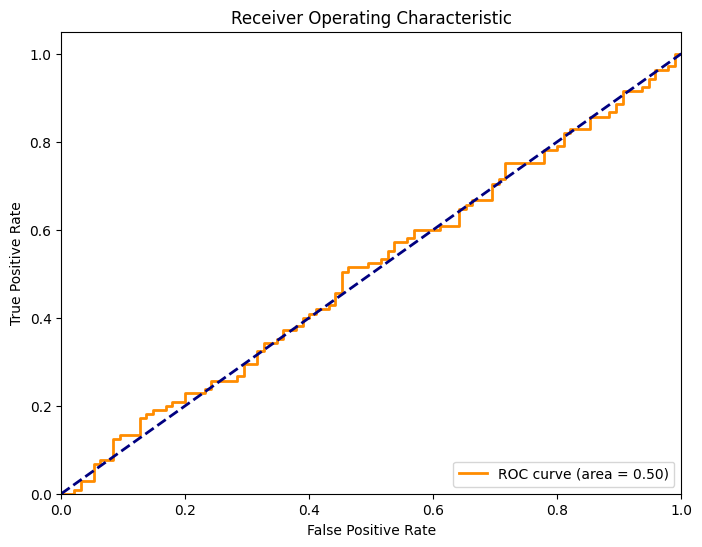

In [12]:
cm = confusion_matrix(y_test.cpu().numpy(), test_predictions.cpu().numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test.cpu().numpy(), test_outputs.cpu().numpy())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [14]:
torch.save(linear.state_dict(), 'trained_model.pth')
print("Model saved successfully.")

loaded_linear = nn.Linear(input_dim, 1)
loaded_linear.load_state_dict(torch.load('trained_model.pth'))
loaded_linear.eval()
print("Model loaded successfully.")

with torch.no_grad():
    loaded_test_outputs = torch.sigmoid(loaded_linear(X_test))
    loaded_test_predictions = (loaded_test_outputs >= 0.5).float()
    loaded_test_accuracy = (loaded_test_predictions == y_test.view(-1, 1)).float().mean().item()

print(f"Test Accuracy (Loaded Model): {loaded_test_accuracy:.4f}")

print("Classification Report (Loaded Model - Test Data):")
print(classification_report(y_test.cpu().numpy(), loaded_test_predictions.cpu().numpy()))


Model saved successfully.
Model loaded successfully.
Test Accuracy (Loaded Model): 0.5200
Classification Report (Loaded Model - Test Data):
              precision    recall  f1-score   support

         0.0       0.49      0.43      0.46        95
         1.0       0.54      0.60      0.57       105

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



In [15]:
learning_rates = [0.001, 0.01, 0.1, 1]
results = {}

for lr in learning_rates:
    linear = nn.Linear(input_dim, 1)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(linear.parameters(), lr=lr)

    num_epochs = 1000
    for epoch in range(1, num_epochs + 1):
        linear.train()
        optimizer.zero_grad()
        logits = linear(X_train)
        outputs = torch.sigmoid(logits)
        loss = criterion(outputs, y_train.view(-1, 1))
        loss.backward()
        optimizer.step()

    linear.eval()
    with torch.no_grad():
        test_outputs = torch.sigmoid(linear(X_test))
        test_predictions = (test_outputs >= 0.5).float()
        test_accuracy = (test_predictions == y_test.view(-1, 1)).float().mean().item()

    results[lr] = test_accuracy
    print(f"Learning rate: {lr}, Test Accuracy: {test_accuracy}")

best_lr = max(results, key=results.get)
print(f"\nBest learning rate: {best_lr}, Test Accuracy: {results[best_lr]}")


Learning rate: 0.001, Test Accuracy: 0.4650000035762787
Learning rate: 0.01, Test Accuracy: 0.5249999761581421
Learning rate: 0.1, Test Accuracy: 0.5049999952316284
Learning rate: 1, Test Accuracy: 0.5049999952316284

Best learning rate: 0.01, Test Accuracy: 0.5249999761581421


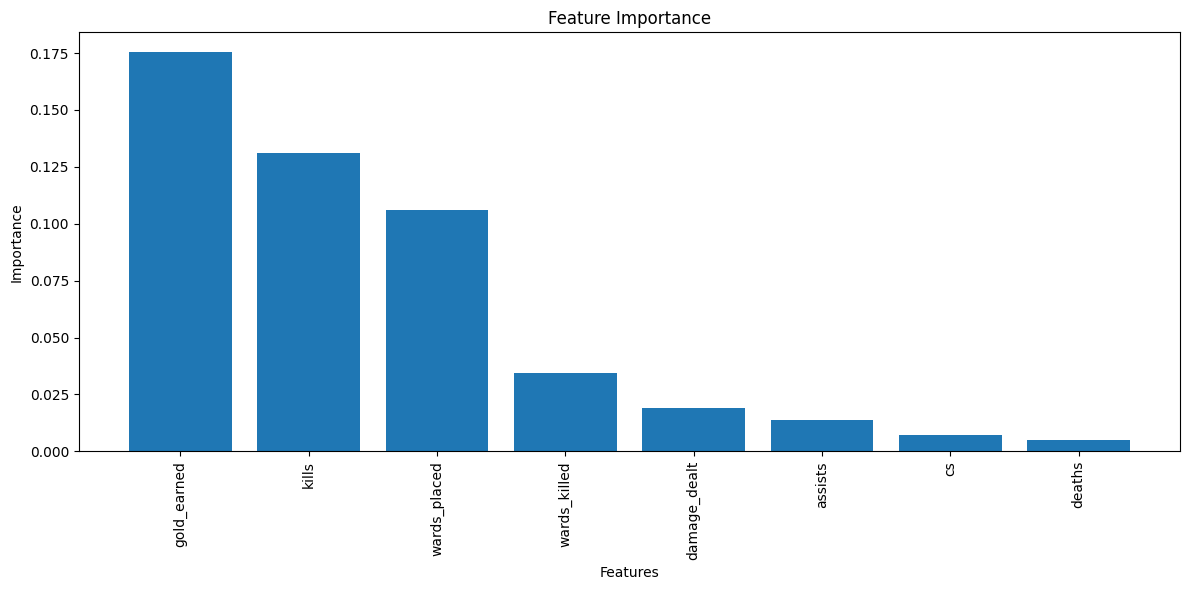

In [16]:
feature_weights = linear.weight.detach().cpu().numpy().flatten()
feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(feature_weights)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
